<a href="https://colab.research.google.com/github/francisayala/Redes_Neuronales/blob/main/labo_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(train_X, train_Y), (test_X, test_Y) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print('Data in Train X, Y: ', train_X.shape , train_Y.shape)
print("Data in Test X, Y: ", test_X.shape, test_Y.shape)

Data in Train X, Y:  (60000, 28, 28) (60000,)
Data in Test X, Y:  (10000, 28, 28) (10000,)


In [ ]:
# Encuentra los valores unicos de la lista de entenamiento
classes = np.unique(train_Y)
nClasses = len(classes)
print("Total number outputs: ", nClasses)
print("Output classes: ", classes)

Total number outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

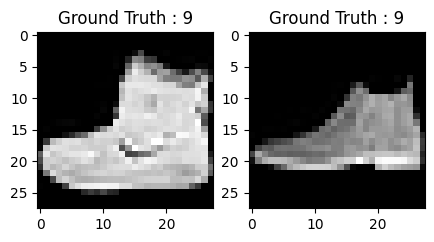

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Normalizacion

In [ ]:
train_X = train_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255

Convertir la img en una linea

In [ ]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2])
train_X.shape

(60000, 784)

In [ ]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])
train_X.shape

(60000, 784)

In [ ]:
train_Y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

El dtype uint8  es un entero sin firma que solo puede tener un valor positivo entre 0 y 255

Convierte clases a codificación one-hot usando keras.utils.to_categorical

In [ ]:
num_classes = 10
train_Y = keras.utils.to_categorical(train_Y, num_classes) #una forma de convertir las etiquetas de clases en un formato "one-hot"
train_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_Y.shape

(60000, 10)

el primer valor equivale al numero de filas , el segundo valor al ser 10 equivale al numero de columnas pero ademas hace notar que esta representando el formato one-hot

In [ ]:
test_Y = keras.utils.to_categorical(test_Y, num_classes)
test_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Crear un modelo conciente

In [ ]:
input_shape  = (train_X[0].shape)
input_shape

(784,)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
train_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(train_Y.shape)

(60000, 10)


In [ ]:
print(train_X.shape)  # Debe tener (60000, altura, ancho, canales) en imágenes
print(train_Y.shape)  # Debe ser (60000, 10) si es one-hot encoding


(60000, 784)
(60000, 10)


In [ ]:
print(np.isnan(train_X).sum())  # Debe ser 0
print(np.isnan(train_Y).sum())  # Debe ser 0

0
0


In [ ]:
print(train_X.dtype)  # Tipo de datos de train_X
print(train_Y.dtype)  # Tipo de datos de train_Y

float32
float64


In [ ]:
batch_size = 128
epochs = 20
history = model.fit(train_X, train_Y, batch_size=batch_size,
                    epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7336 - loss: 0.7848 - val_accuracy: 0.8397 - val_loss: 0.4560
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8499 - loss: 0.4317 - val_accuracy: 0.8503 - val_loss: 0.4136
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8640 - loss: 0.3852 - val_accuracy: 0.8577 - val_loss: 0.3929
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8736 - loss: 0.3532 - val_accuracy: 0.8700 - val_loss: 0.3540
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8820 - loss: 0.3345 - val_accuracy: 0.8767 - val_loss: 0.3478
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.3244 - val_accuracy: 0.8712 - val_loss: 0.3531
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8884 - loss: 0.3020 - val_accuracy: 0.8772 - val_loss: 0.3421
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8937 - loss: 0.2936 - val_accuracy: 0.

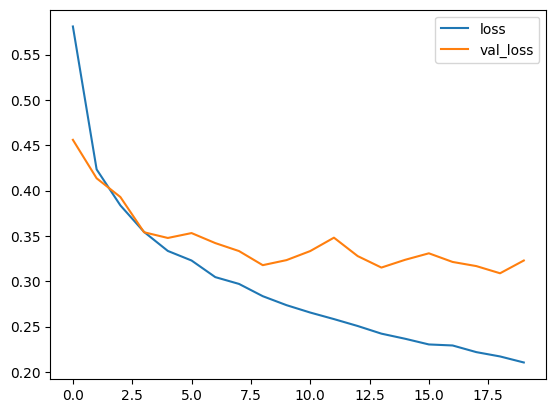

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

In [ ]:
history.history

{'accuracy': [0.8004814982414246,
  0.8525925874710083,
  0.865851879119873,
  0.8733888864517212,
  0.8820555806159973,
  0.8830740451812744,
  0.8890740871429443,
  0.8922777771949768,
  0.8969814777374268,
  0.9007777571678162,
  0.9030185341835022,
  0.9057962894439697,
  0.9080740809440613,
  0.912407398223877,
  0.9135370254516602,
  0.9159444570541382,
  0.9155185222625732,
  0.918759286403656,
  0.9209629893302917,
  0.9229444265365601],
 'loss': [0.5810889005661011,
  0.4234124720096588,
  0.38372352719306946,
  0.3543660640716553,
  0.3334403336048126,
  0.3228743374347687,
  0.30455487966537476,
  0.2970397174358368,
  0.28352445363998413,
  0.2736203074455261,
  0.2654646337032318,
  0.2582402229309082,
  0.2506208121776581,
  0.2421756535768509,
  0.236537367105484,
  0.2302675098180771,
  0.22913384437561035,
  0.22179463505744934,
  0.21702711284160614,
  0.21037279069423676],
 'val_accuracy': [0.8396666646003723,
  0.8503333330154419,
  0.8576666712760925,
  0.870000004

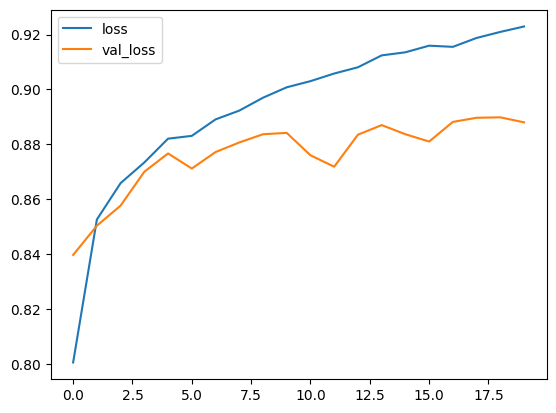

In [ ]:
plt.plot(history.history['accuracy'], label="loss")
plt.plot(history.history['val_accuracy'], label="val_loss")
plt.legend()

In [ ]:
history = model.fit(train_X, train_Y, batch_size=batch_size,
                    epochs=10, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9238 - loss: 0.2091 - val_accuracy: 0.8902 - val_loss: 0.3278
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9272 - loss: 0.1982 - val_accuracy: 0.8843 - val_loss: 0.3363
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.1986 - val_accuracy: 0.8853 - val_loss: 0.3425
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9293 - loss: 0.1914 - val_accuracy: 0.8908 - val_loss: 0.3183
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9302 - loss: 0.1873 - val_accuracy: 0.8888 - val_loss: 0.3239
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9308 - loss: 0.1854 - val_accuracy: 0.8928 - val_loss: 0.3151
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9354 - loss: 0.1764 - val_accuracy: 0.8893 - val_loss: 0.3265
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9345 - loss: 0.1766 - val_accuracy: 0.

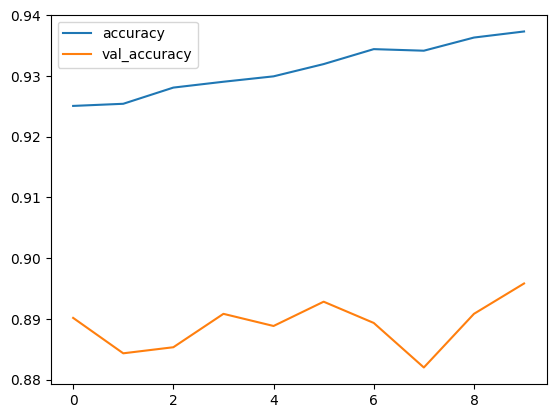

In [ ]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

In [ ]:
model.evaluate(test_X, test_Y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8882 - loss: 0.3496


[0.3539494574069977, 0.886900007724762]

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 128
epochs = 20
history = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7350 - loss: 0.7877 - val_accuracy: 0.8490 - val_loss: 0.4101
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8565 - loss: 0.4052 - val_accuracy: 0.8630 - val_loss: 0.3757
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8709 - loss: 0.3636 - val_accuracy: 0.8692 - val_loss: 0.3605
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8801 - loss: 0.3301 - val_accuracy: 0.8730 - val_loss: 0.3451
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8877 - loss: 0.3088 - val_accuracy: 0.8793 - val_loss: 0.3351
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8901 - loss: 0.2939 - val_accuracy: 0.8800 - val_loss: 0.3320
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8974 - loss: 0.2806 - val_accuracy: 0.8723 - val_loss: 0.3469
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8996 - loss: 0.2724 - val_accuracy: 0.

In [ ]:
model.evaluate(test_X, test_Y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8909 - loss: 0.3350


[0.3366672992706299, 0.8883000016212463]